<a href="https://colab.research.google.com/github/octagomez/clasificador_ropa_ML_minist_3/blob/ML_CLASIFICADOR_ENCENDEDORES_convolutional_neural_network/ML_RED_convolucionales_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISION DIGITAL - REDES CONVOLUCIONALES** 
**REQUERIMIENTO**
- Se necesita crear un modelo de clasificacion por imagenes que clasifique en 3(Tres) marcas de encendedor. Cliper, Descartable, Bic. El modelo debera estar montado y clasificar atravez de una camara en streaming, es decir que la camara al captar con su lente alguno de estos 3 encendedores debe clasificar en CLIPER, DESCARTABLE, BIC segun corresponda.

**PASOS A SEGUIR:**

- **Procesamiento de imagenes**
  - Se deben tomar fotografias con la misma camara con la que se realizara la puesta en produccion, de cada tipo de encendedor minimo 100 fotos cada uno.
  - Convertir el set de datos a un array de numpy.
  - Agregar las etiquetas de las imagenes al array.
  - Guardar Set de datos.
  - Preparar el set de datos para ser procesado (normalizacionde imagenes).
- **Modelo**
  - Split del set en Tain y Test.
  - Entrenar el modelo.
  - Realizar Test del modelo.
  - Evaluar metricas.
  - Ajuste del modelo obtimizado.
- **Deployt**
  - Implementar el modelo para que pueda ser utilizado
  Example: https://www.kdnuggets.com/2022/02/deploying-streamlit-webapp-heroku-dagshub.html

**Si alcanza el tiempo probar mas de un modelo y comparar resultados**




In [1]:
# DESCOMPRIMO EL ZIP CON LAS IMAGENES
import zipfile
import io
data =zipfile.ZipFile('/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER/encendedor_cliper.zip.zip','r')
data.extractall()

In [2]:
#DEFINO EL PAD DE LOS ARCHIVOS
#pad /content/encendedor_cliper
pad = '/content/encendedor_cliper'

In [27]:
# Recorrer el directorio de las imagenes y procesarlas
# documentacion para observar distintas maneras de hacerlo : https://j2logo.com/python/listar-directorio-en-python/

import cv2 #se utiliza para imagenes
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_cliper = '/content/encendedor_cliper'
cliper_training = []
img_size = 80
count=0
for img in os.listdir(ruta_cliper):
  nombre_archivo, extension = os.path.splitext(img)
  # print(extension)
  #valido que el archivo que se procese sea del tipo jpg
  if(extension in ['.jpg','.png']):
    # print(" IMAGEN POSICION :", count, " - ", img)
    img = cv2.imread(os.path.join(ruta_cliper,img))
    # convierte la imagen a escala de grises
    # img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
    img_gray_resize = cv2.resize(img,(img_size,img_size))
    cliper_training.append(img_gray_resize)
  else:
    print(" IMAGEN EXCLUIDA POSICION :", count, " - ", img)
  count = count + 1

print(len(cliper_training))
# CONVIERTO A UN ARRAY DE NUMPY
np_clipers_training = np.array(cliper_training)
# print("shape clipers_training: ", cliper_training.shape)
print("shape np_clipers_training: ",np_clipers_training.shape) # DESCRIPCION DEL SHAPE (cant_figuras, Ancho, Alto, cant_colores)
# print(cliper_training)

 IMAGEN EXCLUIDA POSICION : 88  -  .ipynb_checkpoints
100
shape np_clipers_training:  (100, 80, 80, 3)


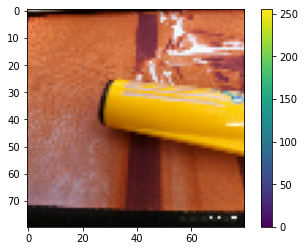

In [31]:
# GRAFICAR DESDE LA LISTA cliper_training
plt.figure()
plt.imshow(np.squeeze(cliper_training[1]))
plt.colorbar()
plt.grid(False)
plt.show()

(80, 80, 3)
GRAFICO DE LA IMAGENTE 9 



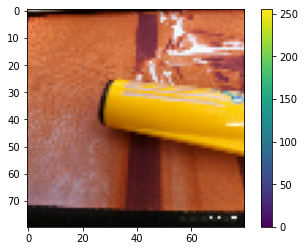

In [47]:
# GRAFICAR DESDE NUMPY np_clipers_training
# recordar que ahora cada posicion del array de np contiene una matriz (imagen) 
print(cliper_training[1].shape)
print("GRAFICO DE LA IMAGENTE 9 \n")

plt.figure()
plt.imshow(np.squeeze(cliper_training[1])) # NOS SIRVE PARA ELIMINAR el indice para poder graficar  (100, 80, 80, 3) -> (80, 80, 3)
plt.colorbar()
plt.grid(False)
plt.show()


In [52]:
%cd '/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER'
!pwd


/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER
/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER


In [ ]:
# GUARDO EL ARRAY NUMPY
np.save('np_clipers_training.npy', np_clipers_training)
# np_clipers_training.tofile('np_clipers_training.dat')
# LEER ARCHIVO
# a2 = np.load('np_clipers_training.npy')
# print(np_clipers_training == a2)

In [61]:
%cd -
!pwd

/content
/content


In [63]:
# LEO LOS ZIPS Y LOS DESCOMPRIMO EN LA VIRTUAL

# DESCOMPRIMO EL ZIP CON LAS IMAGENES
import zipfile
import io
data =zipfile.ZipFile('/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_DESCARTABLE/encendedor_descartable.zip','r')
data.extractall()

data =zipfile.ZipFile('/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_BIC/encendedor_bic.zip','r')
data.extractall()

REPITO LA SECUENCIA ANTERIOR
 - Descoprimir ZIP
 - Leer carpeta y crear la lista de imagenes
 - Convertir la lista en array
 - Guardar array de numpy en disco.

In [67]:
# creo funcion que leer de una carpeta las imagenes y las convierte en array de numpy
# ruta_imagenes = '/content/encendedor_cliper'
# ruta_guardado = '/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_DESCARTABLE'
# nombre_archivo = 'np_encendedor_descartable.npy'
# array_salida =[] # el array de salida es un array en formato lista el return de la funcion es un array np.

def leer_imagenes_guarda_npArray(ruta,nombre_archivo,array_salida):
  array = []
  img_size = 80
  count=0
  for img in os.listdir(ruta):
    nombre_archivo, extension = os.path.splitext(img)
    # print(extension)
    #valido que el archivo que se procese sea del tipo jpg
    if(extension in ['.jpg','.png']):
      # print(" IMAGEN POSICION :", count, " - ", img)
      img = cv2.imread(os.path.join(ruta,img))
      # convierte la imagen a escala de grises
      # img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      # img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
      img_gray_resize = cv2.resize(img,(img_size,img_size))
      array.append(img_gray_resize)
    else:
      print(" IMAGEN EXCLUIDA POSICION :", count, " - ", img)
    count = count + 1
  array_salida = array
  print(len(array_salida))
  # CONVIERTO A UN ARRAY DE NUMPY
  np_array_salida = np.array(array_salida)
  # print("shape clipers_training: ", cliper_training.shape)
  print("shape np_array_salida: ",np_array_salida.shape) # DESCRIPCION DEL SHAPE (cant_figuras, Ancho, Alto, cant_colores)
  # GUARDO EL ARRAY EN LA CARPETA DEFINIDA
  return np_array_salida



In [70]:
# CONVIERTO LA CARPETA DE DESCARTABLES
ruta = '/content/encendedor_descartable'
nombre_archivo = 'np_encendedor_descartable.npy'
descartables_training = []
np_descartables_treiner = leer_imagenes_guarda_npArray(ruta,nombre_archivo,descartables_training)
np_descartables_treiner.shape

%cd '/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_DESCARTABLE'
!pwd
# GUARDO EL ARRAY NUMPY
np.save(nombre_archivo, np_clipers_training)

110
shape np_array_salida:  (110, 80, 80, 3)
/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_DESCARTABLE
/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_DESCARTABLE


In [71]:
# CONVIERTO LA CARPETA DE DESCARTABLES
# PARAMETROS PARA FUNCION
ruta = '/content/encendedor_bic'
nombre_archivo = 'np_encendedor_bic.npy'
bic_training = []
# EJECUTO FUNCION
np_bic_treiner = leer_imagenes_guarda_npArray(ruta,nombre_archivo,bic_training)
np_bic_treiner.shape
# RUTA DONDE QUIERO GUARDAR EL ARCHIVO DE ARRAY NUMPY
%cd '/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_BIC'
!pwd
# GUARDO EL ARRAY NUMPY
np.save(nombre_archivo, np_bic_treiner)

104
shape np_array_salida:  (104, 80, 80, 3)
/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_BIC
/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_BIC


YA TENGO LAS IMAGENES DE LOS 3 ENCENDEDORES COMO MATRIZ DE NUMPY
- CONCATENAR LOS 3 ARRAYS DE NUMPY. (1 SOLO ARRAY)


In [73]:
# CONCATENAR ARRAYS
# Concatena los array pero el resultado es una lista lo que implica que despues de concatenar hay que volver a convertirlo a array de np

# Voy a usar la salida de la funcion, el mismo array que guarde en disco
# RECORDAR EL ORDEN DE CONCATENADO
set_images = np.concatenate([np_clipers_training,np_descartables_treiner, np_bic_treiner])
Set_images = np.array(set_images)

# GUARDO EL ARRAY NUMPY
np.save('array_encendedores.npy', Set_images)


In [75]:
# OBSERVAMOS QUE TENEMOS 314 imagenes en una resolucion de 80x80 de 3 colores
Set_images.shape

(314, 80, 80, 3)

YA TENEMOS NUESTRO SET DE DATOS, AHORA HAY QUE CREAR LAS ETIQUETAS.
# IMPORTANTE
para concatenar los arrays los mismos deben estar en las mismas proporciones, no se pueden concatenar fotos de 150x 150 con 89 x89 lo mismo si esta en 3 dimensiones o 2.

AHORA DEBEMOS HACER LO MISMO PERO CON LAS ETIQUETAS DE QUE CORRESPONDE A CADA IMAGEN


In [77]:
# CREO UN VECTOR para cada array donde se repite el mismo numero x la cantidad de elementos del array
etiquetas_clipler = np.repeat(0,len(np_clipers_training))
print(" Shape array: ", np_clipers_training.shape," largo vector: ",len(etiquetas_clipler) )
etiquetas_descartable = np.repeat(1,len(np_descartables_treiner))
print(" Shape array: ", np_descartables_treiner.shape," largo vector: ",len(etiquetas_descartable) )
etiquetas_bic = np.repeat(2,len(np_bic_treiner))
print(" Shape array: ", np_bic_treiner.shape," largo vector: ",len(etiquetas_bic) )

# CONCATENAMOS LOS VECTORES PARA TENER NUESTRO VECTOR Y 
labels = np.concatenate([etiquetas_clipler,etiquetas_descartable,etiquetas_bic])
Labels = np.array(labels)
# GUARDO EL ARRAY NUMPY
np.save('vector_salida_encendedores.npy', Labels)

# class_names = ['CLIPER','DESCARTABLE','BIC']

 Shape array:  (100, 80, 80, 3)  largo vector:  100
 Shape array:  (110, 80, 80, 3)  largo vector:  110
 Shape array:  (104, 80, 80, 3)  largo vector:  104


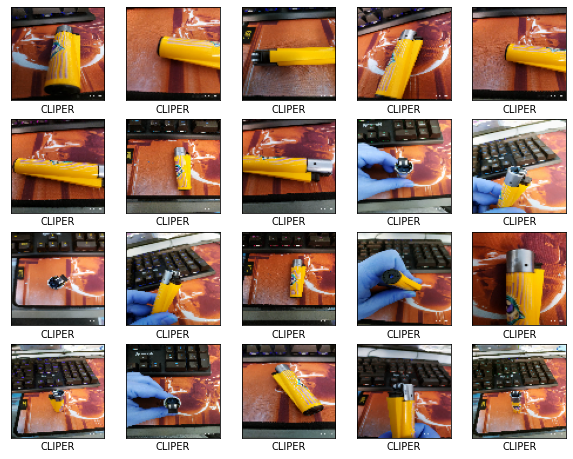

In [97]:


class_names = ['CLIPER','DESCARTABLE','BIC']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Set_images[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels[i]])
plt.show()

(80, 80, 3)
GRAFICO DE LA IMAGENTE 9 



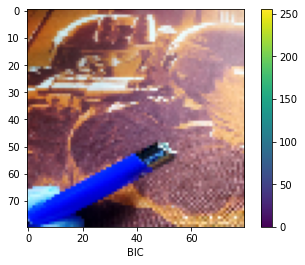

In [101]:
# GRAFICAR DESDE NUMPY np_clipers_training
# recordar que ahora cada posicion del array de np contiene una matriz (imagen) 
print(Set_images[250].shape)
print("GRAFICO DE LA IMAGENTE 9 \n")

plt.figure()
plt.imshow(np.squeeze(Set_images[250])) # NOS SIRVE PARA ELIMINAR el indice para poder graficar  (100, 80, 80, 3) -> (80, 80, 3)
plt.xlabel(class_names[Labels[250]])
plt.colorbar()
plt.grid(False)
plt.show()